In [1]:
!pip install fuzzywuzzy

  Using cached fuzzywuzzy-0.18.0-py2.py3-none-any.whl (18 kB)


## Seller Recomendations

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from fuzzywuzzy import fuzz, process
from datetime import datetime
from matplotlib.backends.backend_pdf import PdfPages

/Users/chetan/anaconda3/lib/python3.11/site-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [3]:
data = pd.read_csv('past_sales.csv')
data.head()

,Date,Seller,Tags,Buyer,Purchase Price,Link,VIN,CARFAX AMT,Reserve Price,Year,...,Trim,Stock #,Mileage,Score,Flag,90,95,100,105,110
0,11/19/23,Jean Dumas Kia - 9194-2318 Qc Inc,NaN,Leduc Automobile,1500,https://app.eblock.com/finished/sold?dateRanGT...,3FADP4EJXDM117146,-,"1,500.00",2013,...,5dr HB SE,-,148358,72/100,1.0,1707.0,2114.0,2521.0,2928.0,3335.0
1,11/18/23,CARS FOR TOYS,"Engine Needs Repair, Former US Vehicle, Out Of...",Magnes Auto Group Ltd.,7200,https://app.eblock.com/finished/sold?dateRanGT...,SALMP1E49BA349307,9882,-,2011,...,4WD 4dr SC Autobiography,APPRAISAL,166800,74/100,1.0,13852.0,14897.0,15943.0,16989.0,18034.0
2,11/18/23,Plaza Chevrolet Buick GMC,"OBDII Codes Present, Out Of Province Vehicle, ...",Global Amana Auto Corp,1800,https://app.eblock.com/finished/sold?dateRanGT...,5XYZUDLB5DG053700,1171,-,2013,...,AWD 4dr 2.4L Auto Luxury,23244B,334206,55/100,1.0,NaN,NaN,NaN,NaN,NaN
3,11/18/23,Baywest Inc - Baywest Nissan,NaN,Scarborough Auto Group - Octane Used Cars,16200,https://app.eblock.com/finished/sold?dateRanGT...,2T1BURHE9KC161442,-,-,2019,...,LE CVT,-,71065,92/100,1.0,15513.0,16648.0,17783.0,18918.0,20053.0
4,11/18/23,Mercedes-Benz Brampton,NaN,5027653 Ontario Inc.,15500,https://app.eblock.com/finished/sold?dateRanGT...,4JGDA2EB6DA159279,-,14000,2013,...,4MATIC 4dr ML 350 BlueTEC,-,187174,84/100,1.0,12383.0,13442.0,14501.0,15560.0,16619.0


In [4]:
data["Score"] = data["Score"].str.split("/").str[0].astype(int)

In [5]:
non_conforming_dates = pd.to_datetime(data['Date'], format='%m/%d/%y', errors='coerce').isna()
data.loc[non_conforming_dates, 'Date'] = pd.NaT
data['Date'] = pd.to_datetime(data['Date'], format='%m/%d/%y', errors='coerce')

In [6]:
data["Greater100"] = data["Purchase Price"] > data["100"]
data["Greater105"] = data["Purchase Price"] > data["105"]
data["Greater110"] = data["Purchase Price"] > data["110"]

In [7]:
data.head()

,Date,Seller,Tags,Buyer,Purchase Price,Link,VIN,CARFAX AMT,Reserve Price,Year,...,Score,Flag,90,95,100,105,110,Greater100,Greater105,Greater110
0,2023-11-19,Jean Dumas Kia - 9194-2318 Qc Inc,NaN,Leduc Automobile,1500,https://app.eblock.com/finished/sold?dateRanGT...,3FADP4EJXDM117146,-,"1,500.00",2013,...,72,1.0,1707.0,2114.0,2521.0,2928.0,3335.0,False,False,False
1,2023-11-18,CARS FOR TOYS,"Engine Needs Repair, Former US Vehicle, Out Of...",Magnes Auto Group Ltd.,7200,https://app.eblock.com/finished/sold?dateRanGT...,SALMP1E49BA349307,9882,-,2011,...,74,1.0,13852.0,14897.0,15943.0,16989.0,18034.0,False,False,False
2,2023-11-18,Plaza Chevrolet Buick GMC,"OBDII Codes Present, Out Of Province Vehicle, ...",Global Amana Auto Corp,1800,https://app.eblock.com/finished/sold?dateRanGT...,5XYZUDLB5DG053700,1171,-,2013,...,55,1.0,NaN,NaN,NaN,NaN,NaN,False,False,False
3,2023-11-18,Baywest Inc - Baywest Nissan,NaN,Scarborough Auto Group - Octane Used Cars,16200,https://app.eblock.com/finished/sold?dateRanGT...,2T1BURHE9KC161442,-,-,2019,...,92,1.0,15513.0,16648.0,17783.0,18918.0,20053.0,False,False,False
4,2023-11-18,Mercedes-Benz Brampton,NaN,5027653 Ontario Inc.,15500,https://app.eblock.com/finished/sold?dateRanGT...,4JGDA2EB6DA159279,-,14000,2013,...,84,1.0,12383.0,13442.0,14501.0,15560.0,16619.0,True,False,False


In [8]:
data[data["Buyer"] == "Bridge Valley"]["Buyer"].count() / data["Buyer"].count()

0.021954376880554197

In [9]:
data[data["Buyer"] == "Bridge Valley"]["Buyer"].count()

1255

In [10]:
data["Buyer"].count()

57164

In [11]:
1255 / 57164

0.021954376880554197

In [12]:
from sklearn.preprocessing import MinMaxScaler

def filter_data(data: pd.DataFrame, make: str, model: str, year: float, trim: str, mileage: float, trim_similarity=80) -> pd.DataFrame:
  """
  Filter data based on make, model, year, mileage, and trim.
  """
  try:
    mileage_std = data['Mileage'].std()
    lower_bound = mileage - mileage_std * 0.15
    upper_bound = mileage + mileage_std * 0.15

    filtered_data = data[(data['Make'] == make) &
                        (data['Model'] == model) &
                        (data['Year'].between(year - 1, year + 1)) &
                        (data["Mileage"].between(lower_bound, upper_bound))]

    filtered_data = filtered_data[filtered_data['Trim'].apply(lambda x: fuzz.ratio(x, trim) >= trim_similarity)]

    result = filtered_data.groupby(['Buyer']).agg({
          "Greater100": "sum",
          "Greater105": "sum",
          "Greater110": "sum",
      }).reset_index()

    purchase_count = filtered_data['Buyer'].value_counts().reset_index()
    purchase_count.columns = ['Buyer', 'Purchase Count']
    result = pd.merge(result, purchase_count, on='Buyer', how='left')

    result["Market Share"] = result["Buyer"].apply(lambda x: (data[data["Buyer"] == x]["Buyer"].count() / data["Buyer"].count()))

    result["Particular Market Share"] = result["Purchase Count"] / result["Purchase Count"].sum()

    result.reset_index(drop=True, inplace=True)
    result.sort_values(by="Purchase Count", ascending=False, inplace=True)

    return result
  except Exception as e:
    print(filtered_data)
    return None


In [13]:
def get_buyer_recommendations(data: pd.DataFrame, make: str, model: str, year: float, trim: str, mileage: float, trim_similarity=80) -> pd.DataFrame:
  """
  Get buyer recommendations based on make, model, year, mileage, and trim.
  """
  recommendations = filter_data(data, make, model, year, trim, mileage, trim_similarity)
  if recommendations is None:
    return None

  plt.figure(figsize=(24, 15))
  plt.suptitle(f"Top 10 Buyers (out of {len(recommendations)}) for {make} {model} {year} {trim} with a Target Mileage of {mileage} and trim similarity of {trim_similarity}%", fontsize=20)

  plt.subplot(3, 2, 1)
  sns.barplot(x="Buyer", y="Purchase Count", data=recommendations[:10])
  plt.xticks([])
  plt.subplot(3, 2, 2)
  sns.barplot(x="Buyer", y="Greater100", data=recommendations[:10])
  plt.ylabel("Purchases with Price > 100% Appraisal")
  plt.xticks([])
  plt.subplot(3, 2, 3)
  sns.barplot(x="Buyer", y="Greater105", data=recommendations[:10])
  plt.ylabel("Purchases with Price > 105% Appraisal")
  plt.xticks([])
  plt.subplot(3, 2, 4)
  sns.barplot(x="Buyer", y="Greater110", data=recommendations[:10])
  plt.ylabel("Purchases with Price > 110% Appraisal")
  plt.xticks([])
  plt.subplot(3, 2, 5)
  sns.barplot(x="Buyer", y="Market Share", data=recommendations[:10])
  plt.xticks(rotation=90)
  plt.subplot(3, 2, 6)
  sns.barplot(x="Buyer", y="Particular Market Share", data=recommendations[:10])
  plt.xticks(rotation=90)
  plt.tight_layout()


  return recommendations



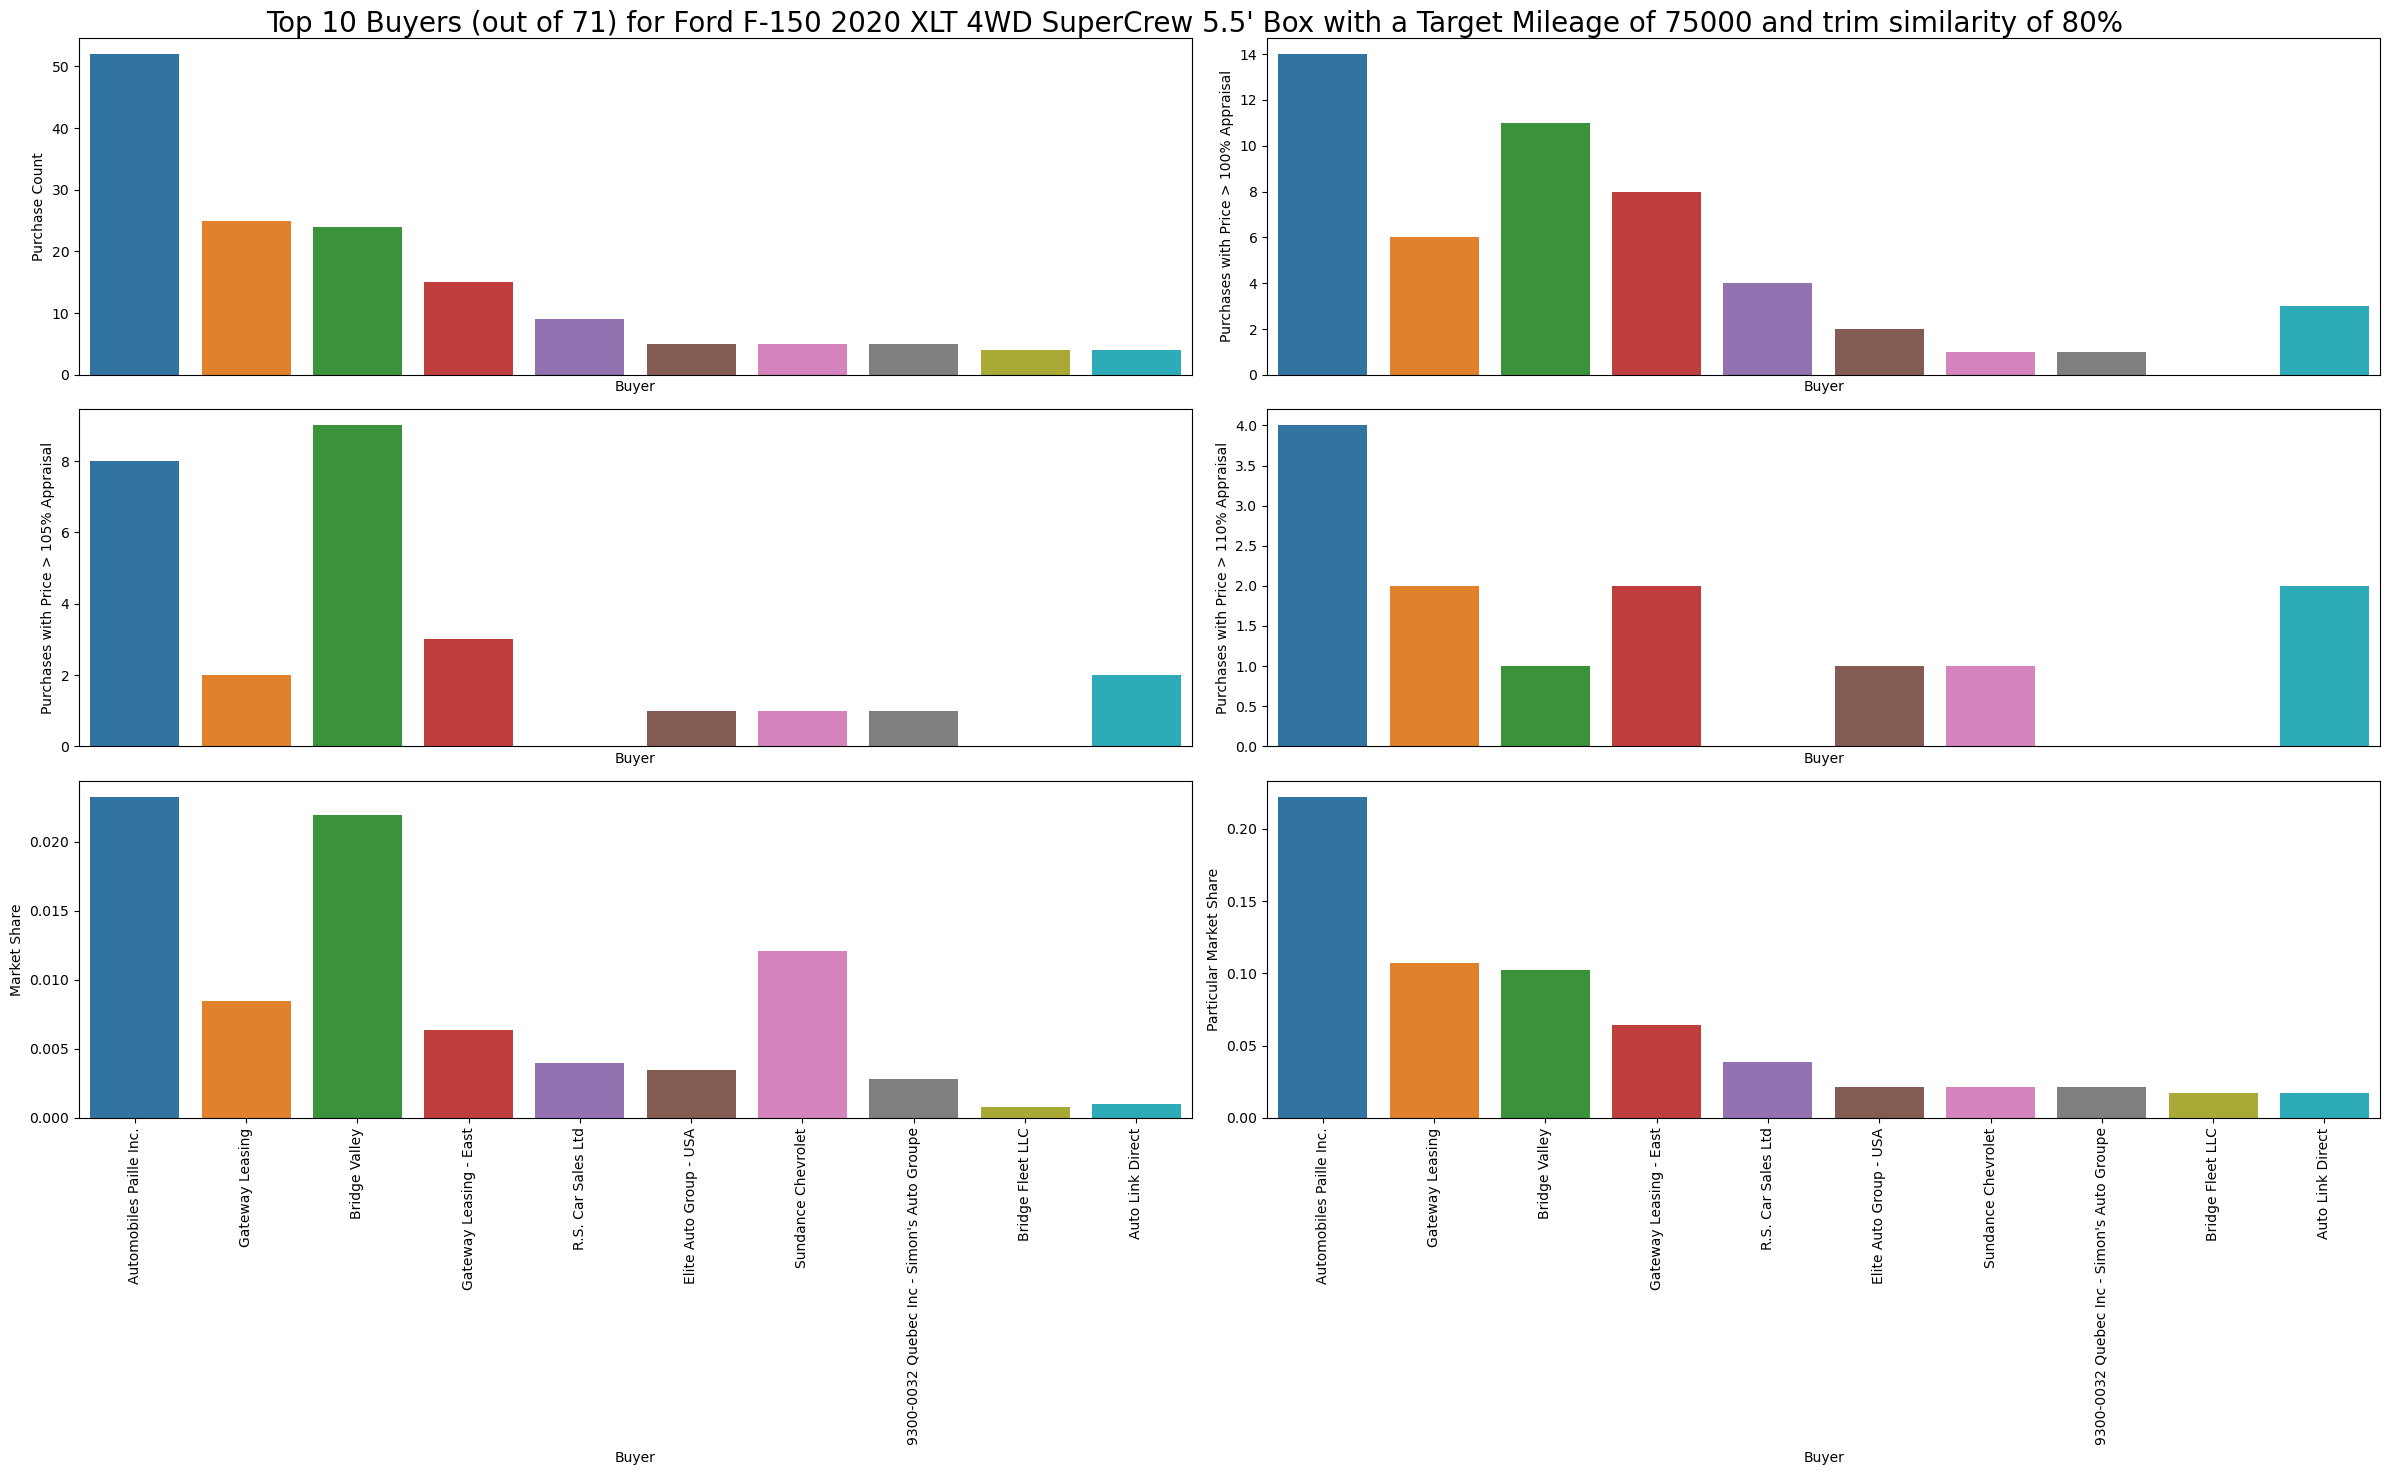

In [14]:
recomendations = get_buyer_recommendations(data, 'Ford', 'F-150', 2020, "XLT 4WD SuperCrew 5.5' Box", 75000)

In [15]:
recomendations.head(10)

,Buyer,Greater100,Greater105,Greater110,Purchase Count,Market Share,Particular Market Share
19,Automobiles Paille Inc.,14,8,4,52,0.023231,0.222222
36,Gateway Leasing,6,2,2,25,0.008467,0.106838
23,Bridge Valley,11,9,1,24,0.021954,0.102564
37,Gateway Leasing - East,8,3,2,15,0.006333,0.064103
57,R.S. Car Sales Ltd,4,0,0,9,0.003936,0.038462
31,Elite Auto Group - USA,2,1,1,5,0.003481,0.021368
64,Sundance Chevrolet,1,1,1,5,0.012071,0.021368
10,9300-0032 Quebec Inc - Simon's Auto Groupe,1,1,0,5,0.002834,0.021368
22,Bridge Fleet LLC,0,0,0,4,0.000770,0.017094
16,Auto Link Direct,3,2,2,4,0.000980,0.017094


In [16]:
recomendations["Particular Market Share"].sum()

0.9999999999999998

In [17]:
len(data)

57164

In [18]:
combination_counts = data[data["Mileage"].between(data["Mileage"].quantile(0.25), data["Mileage"].quantile(0.75))].groupby(['Make', 'Model', 'Year', 'Trim']).size().reset_index(name='count')
sorted_combinations = combination_counts.sort_values(by='count', ascending=False)
print(sorted_combinations)

         Make        Model  Year                                     Trim  \
2817     Ford        F-150  2019               XLT 4WD SuperCrew 5.5' Box   
2798     Ford        F-150  2018               XLT 4WD SuperCrew 5.5' Box   
2547     Ford       Escape  2017                               4WD 4dr SE   
5618      Kia        Forte  2021                                   LX IVT   
2833     Ford        F-150  2020               XLT 4WD SuperCrew 5.5' Box   
...       ...          ...   ...                                      ...   
4437  Hyundai       Accent  2019  5 Door Essential w/Comfort Package Auto   
4432  Hyundai       Accent  2017                            5dr HB Man GL   
4426  Hyundai       Accent  2017                          4dr Sdn Auto LE   
4424  Hyundai       Accent  2016                           5dr HB Auto SE   
9920    Volvo  XC90 Hybrid  2017                   AWD 5dr T8 Inscription   

      count  
2817     79  
2798     71  
2547     64  
5618     63  
2833 

In [19]:
def create_plots(sorted_combinations: pd.DataFrame, num=20):
  mileage = data["Mileage"].median()

  for index, row in sorted_combinations.head(num).iterrows():
      make, model, year, trim = row['Make'], row['Model'], row['Year'], row['Trim']

      recommendations = get_buyer_recommendations(data, make, model, year, trim, mileage)
      plt.show()

      fig, ax = plt.subplots(figsize=(24, 10))
      ax.axis('tight')
      ax.axis('off')
      table_data = recommendations.head(10)
      table = ax.table(cellText=table_data.values, colLabels=table_data.columns, loc='center')
      plt.title(f"Top 10 Buyers (out of {len(recommendations)}) for {make} {model} {year} {trim} with a Target Mileage of {mileage}", fontsize=20)
      plt.show()



In [20]:
# create_plots(sorted_combinations)

In [21]:
def create_report(sorted_combinations: pd.DataFrame, num=20):
  pdf = PdfPages('buyer_recommendations_report.pdf')

  mileage = data["Mileage"].median()

  for index, row in sorted_combinations.head(num).iterrows():
      make, model, year, trim = row['Make'], row['Model'], row['Year'], row['Trim']

      recommendations = get_buyer_recommendations(data, make, model, year, trim, mileage)

      pdf.savefig(plt.gcf())
      plt.close()

      fig, ax = plt.subplots(figsize=(24, 10))
      ax.axis('tight')
      ax.axis('off')
      table_data = recommendations.head(10)
      table = ax.table(cellText=table_data.values, colLabels=table_data.columns, loc='center')
      plt.title(f"Top 10 Buyers (out of {len(recommendations)}) for {make} {model} {year} {trim} with a Target Mileage of {mileage}", fontsize=20)
      pdf.savefig(fig, bbox_inches='tight')
      plt.close()

  pdf.close()


In [22]:
create_report(sorted_combinations)

In [23]:
combination_counts.sort_values(by="count", ascending=False)

,Make,Model,Year,Trim,count
2817,Ford,F-150,2019,XLT 4WD SuperCrew 5.5' Box,79
2798,Ford,F-150,2018,XLT 4WD SuperCrew 5.5' Box,71
2547,Ford,Escape,2017,4WD 4dr SE,64
5618,Kia,Forte,2021,LX IVT,63
2833,Ford,F-150,2020,XLT 4WD SuperCrew 5.5' Box,63
...,...,...,...,...,...
4437,Hyundai,Accent,2019,5 Door Essential w/Comfort Package Auto,1
4432,Hyundai,Accent,2017,5dr HB Man GL,1
4426,Hyundai,Accent,2017,4dr Sdn Auto LE,1
4424,Hyundai,Accent,2016,5dr HB Auto SE,1


In [24]:
len(combination_counts.sort_values(by="count", ascending=False))

9921

In [25]:
sorted_combinations.head(20)

,Make,Model,Year,Trim,count
2817,Ford,F-150,2019,XLT 4WD SuperCrew 5.5' Box,79
2798,Ford,F-150,2018,XLT 4WD SuperCrew 5.5' Box,71
2547,Ford,Escape,2017,4WD 4dr SE,64
5618,Kia,Forte,2021,LX IVT,63
2833,Ford,F-150,2020,XLT 4WD SuperCrew 5.5' Box,63
2834,Ford,F-150,2020,XLT 4WD SuperCrew 6.5' Box,58
2818,Ford,F-150,2019,XLT 4WD SuperCrew 6.5' Box,54
4510,Hyundai,Elantra,2017,4dr Sdn Auto GL,53
1325,Chevrolet,Cruze,2014,4dr Sdn 1LT,53
2532,Ford,Escape,2014,4WD 4dr SE,50


In [26]:
def prep_data(sorted_combinations: pd.DataFrame, rec_count: int = 20, buyer_count: int = 20):
  mileage = data["Mileage"].median()
  results = []
  for index, row in sorted_combinations.head(rec_count).iterrows():
      make, model, year, trim = row['Make'], row['Model'], row['Year'], row['Trim']
      recommendations = filter_data(data, make, model, year, trim, mileage).head(buyer_count)
      recommendations["Make"] = make
      recommendations["Model"] = model
      recommendations["Year"] = year
      recommendations["Trim"] = trim
      recommendations = recommendations[["Make", "Model", "Year", "Trim", "Buyer", "Greater100", "Greater105", "Greater110", "Purchase Count", "Market Share", "Particular Market Share"]]
      results.append(recommendations)

  return pd.concat(results, axis=0).reset_index(drop=True)


In [27]:
total_recomendations = prep_data(sorted_combinations)

In [28]:
total_recomendations.head(40)

,Make,Model,Year,Trim,Buyer,Greater100,Greater105,Greater110,Purchase Count,Market Share,Particular Market Share
0,Ford,F-150,2019,XLT 4WD SuperCrew 5.5' Box,Bridge Valley,7,3,2,16,0.021954,0.137931
1,Ford,F-150,2019,XLT 4WD SuperCrew 5.5' Box,Automobiles Paille Inc.,6,4,1,15,0.023231,0.129310
2,Ford,F-150,2019,XLT 4WD SuperCrew 5.5' Box,R.S. Car Sales Ltd,0,0,0,9,0.003936,0.077586
3,Ford,F-150,2019,XLT 4WD SuperCrew 5.5' Box,Gateway Leasing - East,0,0,0,5,0.006333,0.043103
4,Ford,F-150,2019,XLT 4WD SuperCrew 5.5' Box,Explorer Van Canada,2,1,0,5,0.001697,0.043103
5,Ford,F-150,2019,XLT 4WD SuperCrew 5.5' Box,2776588 Ontario Limited - Trucktown,0,0,0,4,0.008519,0.034483
6,Ford,F-150,2019,XLT 4WD SuperCrew 5.5' Box,Gateway Leasing,2,2,1,4,0.008467,0.034483
7,Ford,F-150,2019,XLT 4WD SuperCrew 5.5' Box,1202894 Ontario Inc - Edwards Mazda,2,2,2,3,0.002484,0.025862
8,Ford,F-150,2019,XLT 4WD SuperCrew 5.5' Box,European Auto Gallery,2,2,2,3,0.012123,0.025862
9,Ford,F-150,2019,XLT 4WD SuperCrew 5.5' Box,1716858 Ontario Inc.,0,0,0,2,0.002886,0.017241


## With Purchase Age

In [29]:
total_recomendations.to_csv("buyer_recommendations.csv", index=False)

In [30]:
temp = data.copy()

In [31]:
temp["Purchase Age"] = datetime.now() - temp["Date"]
temp["Purchase Age"] = temp["Purchase Age"].dt.days

In [32]:
temp[["Buyer", "Make", "Model", "Date", "Purchase Age"]][temp["Purchase Age"] < 0]

,Buyer,Make,Model,Date,Purchase Age


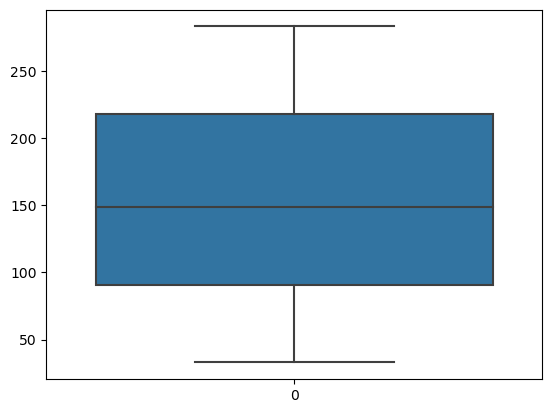

In [33]:
sns.boxplot(temp["Purchase Age"])
plt.show()

In [34]:
from sklearn.preprocessing import MinMaxScaler

def filter_data_temp(data: pd.DataFrame, make: str, model: str, year: float, trim: str, mileage: float, trim_similarity=80) -> pd.DataFrame:
  """
  Filter data based on make, model, year, mileage, and trim.
  """
  try:
    mileage_std = data['Mileage'].std()
    lower_bound = mileage - mileage_std * 0.15
    upper_bound = mileage + mileage_std * 0.15

    filtered_data = data[(data['Make'] == make) &
                        (data['Model'] == model) &
                        (data['Year'].between(year - 1, year + 1)) &
                        (data["Mileage"].between(lower_bound, upper_bound))]

    filtered_data = filtered_data[filtered_data['Trim'].apply(lambda x: fuzz.ratio(x, trim) >= trim_similarity)]

    result = filtered_data.groupby(['Buyer']).agg({
          "Greater100": "sum",
          "Greater105": "sum",
          "Greater110": "sum",
          "Purchase Age": "mean"
      }).reset_index()

    purchase_count = filtered_data['Buyer'].value_counts().reset_index()
    purchase_count.columns = ['Buyer', 'Purchase Count']
    result = pd.merge(result, purchase_count, on='Buyer', how='left')

    result["Market Share"] = result["Buyer"].apply(lambda x: (data[data["Buyer"] == x]["Buyer"].count() / data["Buyer"].count()))

    result["Particular Market Share"] = result["Purchase Count"] / result["Purchase Count"].sum()
    # result["Purchase Age"] = MinMaxScaler().fit_transform(result["Purchase Age"].values.reshape(-1, 1))
    result["Inverse Age"] = 1 / result["Purchase Age"]

    result.reset_index(drop=True, inplace=True)
    result.sort_values(by="Purchase Count", ascending=False, inplace=True)

    return result
  except Exception as e:
    print(e)
    return None


In [35]:
def get_buyer_recommendations_temp(data: pd.DataFrame, make: str, model: str, year: float, trim: str, mileage: float, trim_similarity=80) -> pd.DataFrame:
  """
  Get buyer recommendations based on make, model, year, mileage, and trim.
  """
  recommendations = filter_data_temp(data, make, model, year, trim, mileage, trim_similarity)
  if recommendations is None:
    return None

  plt.figure(figsize=(24, 15))
  plt.suptitle(f"Top 10 Buyers (out of {len(recommendations)}) for {make} {model} {year} {trim} with a Target Mileage of {mileage} and trim similarity of {trim_similarity}%", fontsize=20)

  plt.subplot(4, 2, 1)
  sns.barplot(x="Buyer", y="Purchase Count", data=recommendations[:10])
  plt.xticks([])
  plt.subplot(4, 2, 2)
  sns.barplot(x="Buyer", y="Greater100", data=recommendations[:10])
  plt.ylabel("Purchases with Price > 100% Appraisal")
  plt.xticks([])
  plt.subplot(4, 2, 3)
  sns.barplot(x="Buyer", y="Greater105", data=recommendations[:10])
  plt.ylabel("Purchases with Price > 105% Appraisal")
  plt.xticks([])
  plt.subplot(4, 2, 4)
  sns.barplot(x="Buyer", y="Greater110", data=recommendations[:10])
  plt.ylabel("Purchases with Price > 110% Appraisal")
  plt.xticks([])
  plt.subplot(4, 2, 5)
  sns.barplot(x="Buyer", y="Market Share", data=recommendations[:10])
  plt.xticks([])
  plt.subplot(4, 2, 6)
  sns.barplot(x="Buyer", y="Particular Market Share", data=recommendations[:10])
  plt.xticks([])
  plt.subplot(4, 2, 7)
  sns.barplot(x="Buyer", y="Purchase Age", data=recommendations[:10])
  plt.xticks(rotation=90)
  plt.ylabel("Purchase Age (Days)")
  plt.subplot(4, 2, 8)
  sns.barplot(x="Buyer", y="Inverse Age", data=recommendations[:10])
  plt.xticks(rotation=90)


  return recommendations



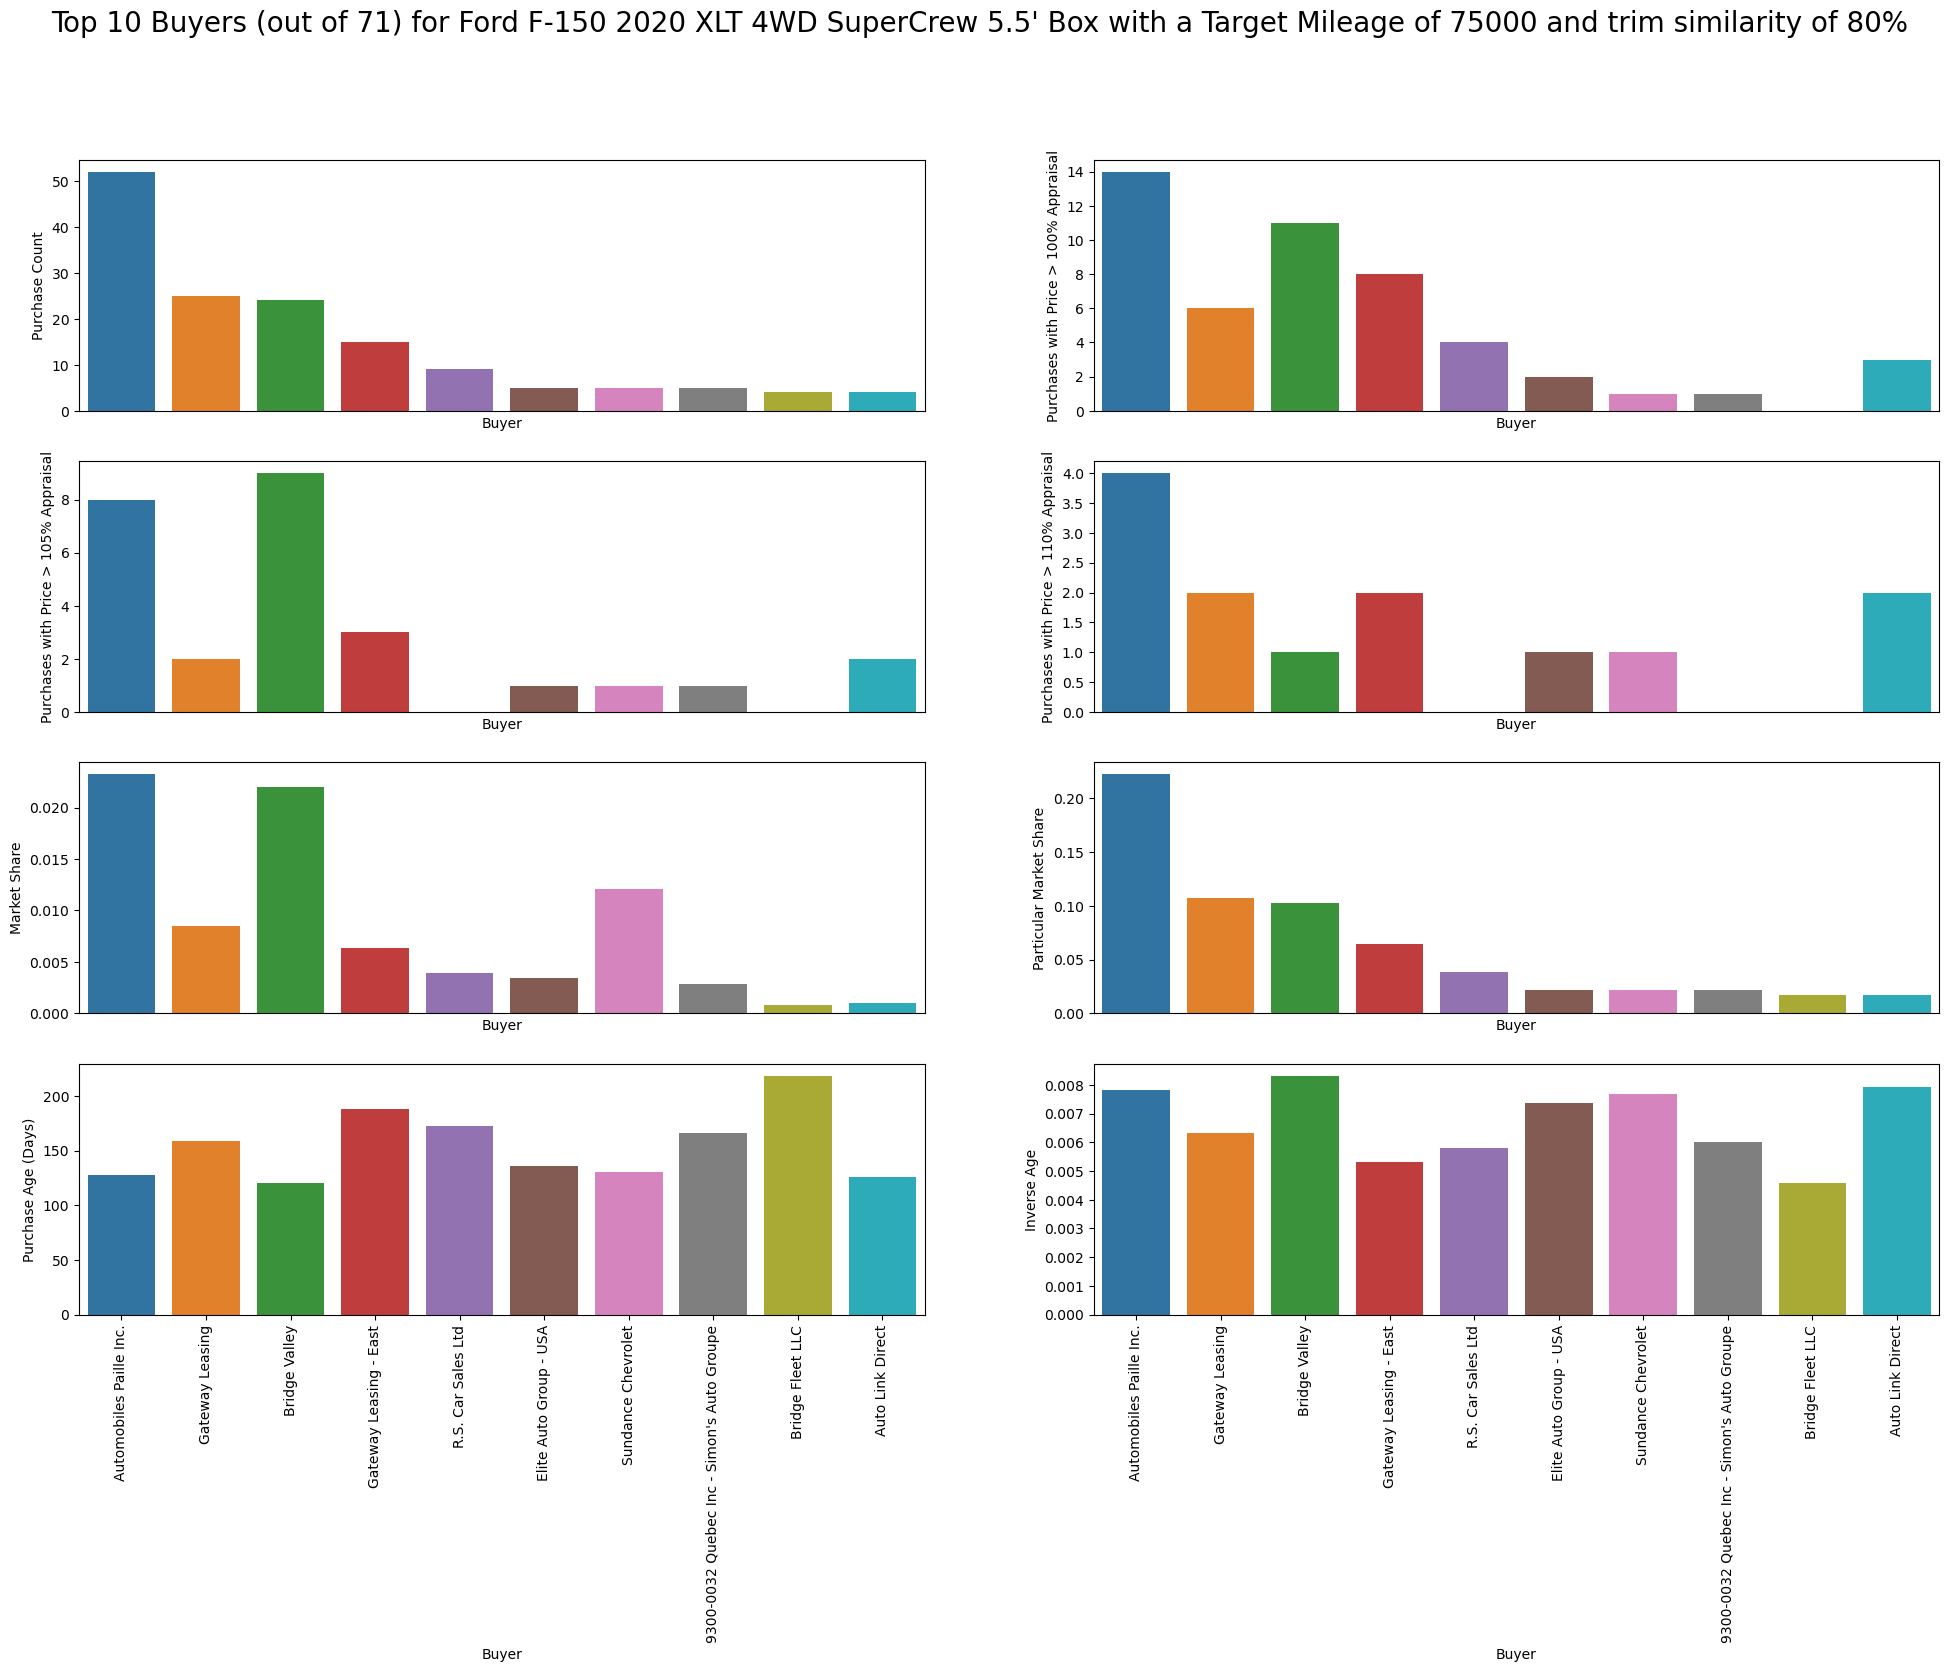

In [36]:
recomendations = get_buyer_recommendations_temp(temp, 'Ford', 'F-150', 2020, "XLT 4WD SuperCrew 5.5' Box", 75000)

In [37]:
def create_plots_temp(sorted_combinations: pd.DataFrame, num=20):
  mileage = data["Mileage"].median()

  for index, row in sorted_combinations.head(num).iterrows():
      make, model, year, trim = row['Make'], row['Model'], row['Year'], row['Trim']

      recommendations = get_buyer_recommendations_temp(temp, make, model, year, trim, mileage)
      plt.show()

      fig, ax = plt.subplots(figsize=(24, 10))
      ax.axis('tight')
      ax.axis('off')
      table_data = recommendations.head(10)
      table = ax.table(cellText=table_data.values, colLabels=table_data.columns, loc='center')
      plt.title(f"Top 10 Buyers (out of {len(recommendations)}) for {make} {model} {year} {trim} with a Target Mileage of {mileage}", fontsize=20)
      plt.show()



In [38]:
# create_plots_temp(sorted_combinations)

In [39]:
def create_report_temp(sorted_combinations: pd.DataFrame, num=20):
  pdf = PdfPages('buyer_recommendations_report_temp.pdf')

  mileage = data["Mileage"].median()

  for index, row in sorted_combinations.head(num).iterrows():
      make, model, year, trim = row['Make'], row['Model'], row['Year'], row['Trim']

      recommendations = get_buyer_recommendations_temp(temp, make, model, year, trim, mileage)

      pdf.savefig(plt.gcf())
      plt.close()

      fig, ax = plt.subplots(figsize=(24, 10))
      ax.axis('tight')
      ax.axis('off')
      table_data = recommendations.head(10)
      table = ax.table(cellText=table_data.values, colLabels=table_data.columns, loc='center')
      plt.title(f"Top 10 Buyers (out of {len(recommendations)}) for {make} {model} {year} {trim} with a Target Mileage of {mileage}", fontsize=20)
      pdf.savefig(fig, bbox_inches='tight')
      plt.close()

  pdf.close()


In [40]:
create_report_temp(sorted_combinations)

In [41]:
def prep_data(sorted_combinations: pd.DataFrame, rec_count: int = 20, buyer_count: int = 20):
  mileage = temp["Mileage"].median()
  results = []
  for index, row in sorted_combinations.head(rec_count).iterrows():
      make, model, year, trim = row['Make'], row['Model'], row['Year'], row['Trim']
      recommendations = filter_data_temp(temp, make, model, year, trim, mileage).head(buyer_count)
      recommendations["Make"] = make
      recommendations["Model"] = model
      recommendations["Year"] = year
      recommendations["Trim"] = trim
      recommendations = recommendations[["Make", "Model", "Year", "Trim", "Buyer", "Greater100", "Greater105", "Greater110", "Purchase Count", "Market Share", "Particular Market Share", "Purchase Age", "Inverse Age"]]
      results.append(recommendations)

  return pd.concat(results, axis=0).reset_index(drop=True)


In [42]:
prep_data(sorted_combinations).to_csv("buyer_recommendations_purchase_age.csv", index=False)

In [43]:
total_rec_temp = prep_data(sorted_combinations)
total_rec_temp.head(10)

,Make,Model,Year,Trim,Buyer,Greater100,Greater105,Greater110,Purchase Count,Market Share,Particular Market Share,Purchase Age,Inverse Age
0,Ford,F-150,2019,XLT 4WD SuperCrew 5.5' Box,Bridge Valley,7,3,2,16,0.021954,0.137931,135.200000,0.007396
1,Ford,F-150,2019,XLT 4WD SuperCrew 5.5' Box,Automobiles Paille Inc.,6,4,1,15,0.023231,0.129310,174.285714,0.005738
2,Ford,F-150,2019,XLT 4WD SuperCrew 5.5' Box,R.S. Car Sales Ltd,0,0,0,9,0.003936,0.077586,143.500000,0.006969
3,Ford,F-150,2019,XLT 4WD SuperCrew 5.5' Box,Gateway Leasing - East,0,0,0,5,0.006333,0.043103,143.800000,0.006954
4,Ford,F-150,2019,XLT 4WD SuperCrew 5.5' Box,Explorer Van Canada,2,1,0,5,0.001697,0.043103,137.000000,0.007299
5,Ford,F-150,2019,XLT 4WD SuperCrew 5.5' Box,2776588 Ontario Limited - Trucktown,0,0,0,4,0.008519,0.034483,102.250000,0.009780
6,Ford,F-150,2019,XLT 4WD SuperCrew 5.5' Box,Gateway Leasing,2,2,1,4,0.008467,0.034483,186.500000,0.005362
7,Ford,F-150,2019,XLT 4WD SuperCrew 5.5' Box,1202894 Ontario Inc - Edwards Mazda,2,2,2,3,0.002484,0.025862,178.000000,0.005618
8,Ford,F-150,2019,XLT 4WD SuperCrew 5.5' Box,European Auto Gallery,2,2,2,3,0.012123,0.025862,172.666667,0.005792
9,Ford,F-150,2019,XLT 4WD SuperCrew 5.5' Box,1716858 Ontario Inc.,0,0,0,2,0.002886,0.017241,191.000000,0.005236


In [44]:
def create_buyer_data(sorted_combinations: pd.DataFrame, rec_count: int = 20, buyer_count: int = 20):
  total_rec_temp = prep_data(sorted_combinations, rec_count=rec_count, buyer_count=buyer_count)
  buyer_group = total_rec_temp.groupby(['Buyer']).agg({
    "Greater100": "sum",
    "Greater105": "sum",
    "Greater110": "sum",
    "Purchase Count": "sum",
    "Market Share": "mean",
    "Particular Market Share": "mean",
    "Purchase Age": "mean",
    "Inverse Age": "mean"
  }).reset_index().sort_values(by="Purchase Count", ascending=False)
  return buyer_group

In [45]:
buyer_group = create_buyer_data(sorted_combinations)
buyer_group.head()

,Buyer,Greater100,Greater105,Greater110,Purchase Count,Market Share,Particular Market Share,Purchase Age,Inverse Age
38,Bridge Valley,47,24,16,116,0.021954,0.143662,128.487710,0.008076
29,Automobiles Paille Inc.,39,26,8,98,0.023231,0.130771,166.249339,0.006191
108,R.S. Car Sales Ltd,3,2,1,59,0.003936,0.079109,141.562500,0.007144
63,Gateway Leasing - East,2,2,2,35,0.006333,0.047581,164.396296,0.006286
62,Gateway Leasing,14,14,8,32,0.008467,0.046819,156.055556,0.006884


In [46]:
buyer_group = create_buyer_data(sorted_combinations, rec_count=100, buyer_count=30)
buyer_group.head()

,Buyer,Greater100,Greater105,Greater110,Purchase Count,Market Share,Particular Market Share,Purchase Age,Inverse Age
120,Bridge Valley,104,70,39,229,0.021954,0.135397,154.312320,0.007365
101,Automobiles Paille Inc.,71,46,21,168,0.023231,0.121641,148.577899,0.007282
320,R.S. Car Sales Ltd,15,10,5,97,0.003936,0.083846,164.842105,0.006410
192,Gateway Leasing,33,30,19,68,0.008467,0.061170,149.575000,0.007871
193,Gateway Leasing - East,13,12,11,67,0.006333,0.055733,166.911905,0.006667


In [47]:
buyer_group.to_csv("buyer_data_30_100.csv", index=False)

In [48]:
rec = prep_data(sorted_combinations, rec_count=100, buyer_count=30)
rec.head(40)

,Make,Model,Year,Trim,Buyer,Greater100,Greater105,Greater110,Purchase Count,Market Share,Particular Market Share,Purchase Age,Inverse Age
0,Ford,F-150,2019,XLT 4WD SuperCrew 5.5' Box,Bridge Valley,7,3,2,16,0.021954,0.137931,135.200000,0.007396
1,Ford,F-150,2019,XLT 4WD SuperCrew 5.5' Box,Automobiles Paille Inc.,6,4,1,15,0.023231,0.129310,174.285714,0.005738
2,Ford,F-150,2019,XLT 4WD SuperCrew 5.5' Box,R.S. Car Sales Ltd,0,0,0,9,0.003936,0.077586,143.500000,0.006969
3,Ford,F-150,2019,XLT 4WD SuperCrew 5.5' Box,Gateway Leasing - East,0,0,0,5,0.006333,0.043103,143.800000,0.006954
4,Ford,F-150,2019,XLT 4WD SuperCrew 5.5' Box,Explorer Van Canada,2,1,0,5,0.001697,0.043103,137.000000,0.007299
5,Ford,F-150,2019,XLT 4WD SuperCrew 5.5' Box,2776588 Ontario Limited - Trucktown,0,0,0,4,0.008519,0.034483,102.250000,0.009780
6,Ford,F-150,2019,XLT 4WD SuperCrew 5.5' Box,Gateway Leasing,2,2,1,4,0.008467,0.034483,186.500000,0.005362
7,Ford,F-150,2019,XLT 4WD SuperCrew 5.5' Box,1202894 Ontario Inc - Edwards Mazda,2,2,2,3,0.002484,0.025862,178.000000,0.005618
8,Ford,F-150,2019,XLT 4WD SuperCrew 5.5' Box,European Auto Gallery,2,2,2,3,0.012123,0.025862,172.666667,0.005792
9,Ford,F-150,2019,XLT 4WD SuperCrew 5.5' Box,1716858 Ontario Inc.,0,0,0,2,0.002886,0.017241,191.000000,0.005236


In [49]:
rec.to_csv("buyer_recommendations_30_100.csv")

## Analysis of only make and model

In [50]:
from sklearn.preprocessing import MinMaxScaler

def filter_data_make_model(data: pd.DataFrame, make: str, model: str) -> pd.DataFrame:
  """
  Filter data based on make, model
  """
  try:
    filtered_data = data[(data['Make'] == make) &
                        (data['Model'] == model)]

    result = filtered_data.groupby(['Buyer']).agg({
          "Greater100": "sum",
          "Greater105": "sum",
          "Greater110": "sum",
          "Purchase Age": "mean"
      }).reset_index()

    purchase_count = filtered_data['Buyer'].value_counts().reset_index()
    purchase_count.columns = ['Buyer', 'Purchase Count']
    result = pd.merge(result, purchase_count, on='Buyer', how='left')

    result["Market Share"] = result["Buyer"].apply(lambda x: (data[data["Buyer"] == x]["Buyer"].count() / data["Buyer"].count()))

    result["Particular Market Share"] = result["Purchase Count"] / result["Purchase Count"].sum()
    # result["Purchase Age"] = MinMaxScaler().fit_transform(result["Purchase Age"].values.reshape(-1, 1))
    result["Inverse Age"] = 1 / result["Purchase Age"]

    result.reset_index(drop=True, inplace=True)
    result.sort_values(by="Purchase Count", ascending=False, inplace=True)

    return result
  except Exception as e:
    print(e)
    return None


In [51]:
def get_buyer_recommendations_make_model(data: pd.DataFrame, make: str, model: str) -> pd.DataFrame:
  """
  Get buyer recommendations based on make, model, year, mileage, and trim.
  """
  recommendations = filter_data_make_model(data, make, model)
  if recommendations is None:
    return None

  plt.figure(figsize=(24, 15))
  plt.suptitle(f"Top 10 Buyers (out of {len(recommendations)}) for {make} {model}", fontsize=20)

  plt.subplot(4, 2, 1)
  sns.barplot(x="Buyer", y="Purchase Count", data=recommendations[:10])
  plt.xticks([])
  plt.subplot(4, 2, 2)
  sns.barplot(x="Buyer", y="Greater100", data=recommendations[:10])
  plt.ylabel("Purchases with Price > 100% Appraisal")
  plt.xticks([])
  plt.subplot(4, 2, 3)
  sns.barplot(x="Buyer", y="Greater105", data=recommendations[:10])
  plt.ylabel("Purchases with Price > 105% Appraisal")
  plt.xticks([])
  plt.subplot(4, 2, 4)
  sns.barplot(x="Buyer", y="Greater110", data=recommendations[:10])
  plt.ylabel("Purchases with Price > 110% Appraisal")
  plt.xticks([])
  plt.subplot(4, 2, 5)
  sns.barplot(x="Buyer", y="Market Share", data=recommendations[:10])
  plt.xticks([])
  plt.subplot(4, 2, 6)
  sns.barplot(x="Buyer", y="Particular Market Share", data=recommendations[:10])
  plt.xticks([])
  plt.subplot(4, 2, 7)
  sns.barplot(x="Buyer", y="Purchase Age", data=recommendations[:10])
  plt.xticks(rotation=90)
  plt.ylabel("Purchase Age (Days)")
  plt.subplot(4, 2, 8)
  sns.barplot(x="Buyer", y="Inverse Age", data=recommendations[:10])
  plt.xticks(rotation=90)


  return recommendations



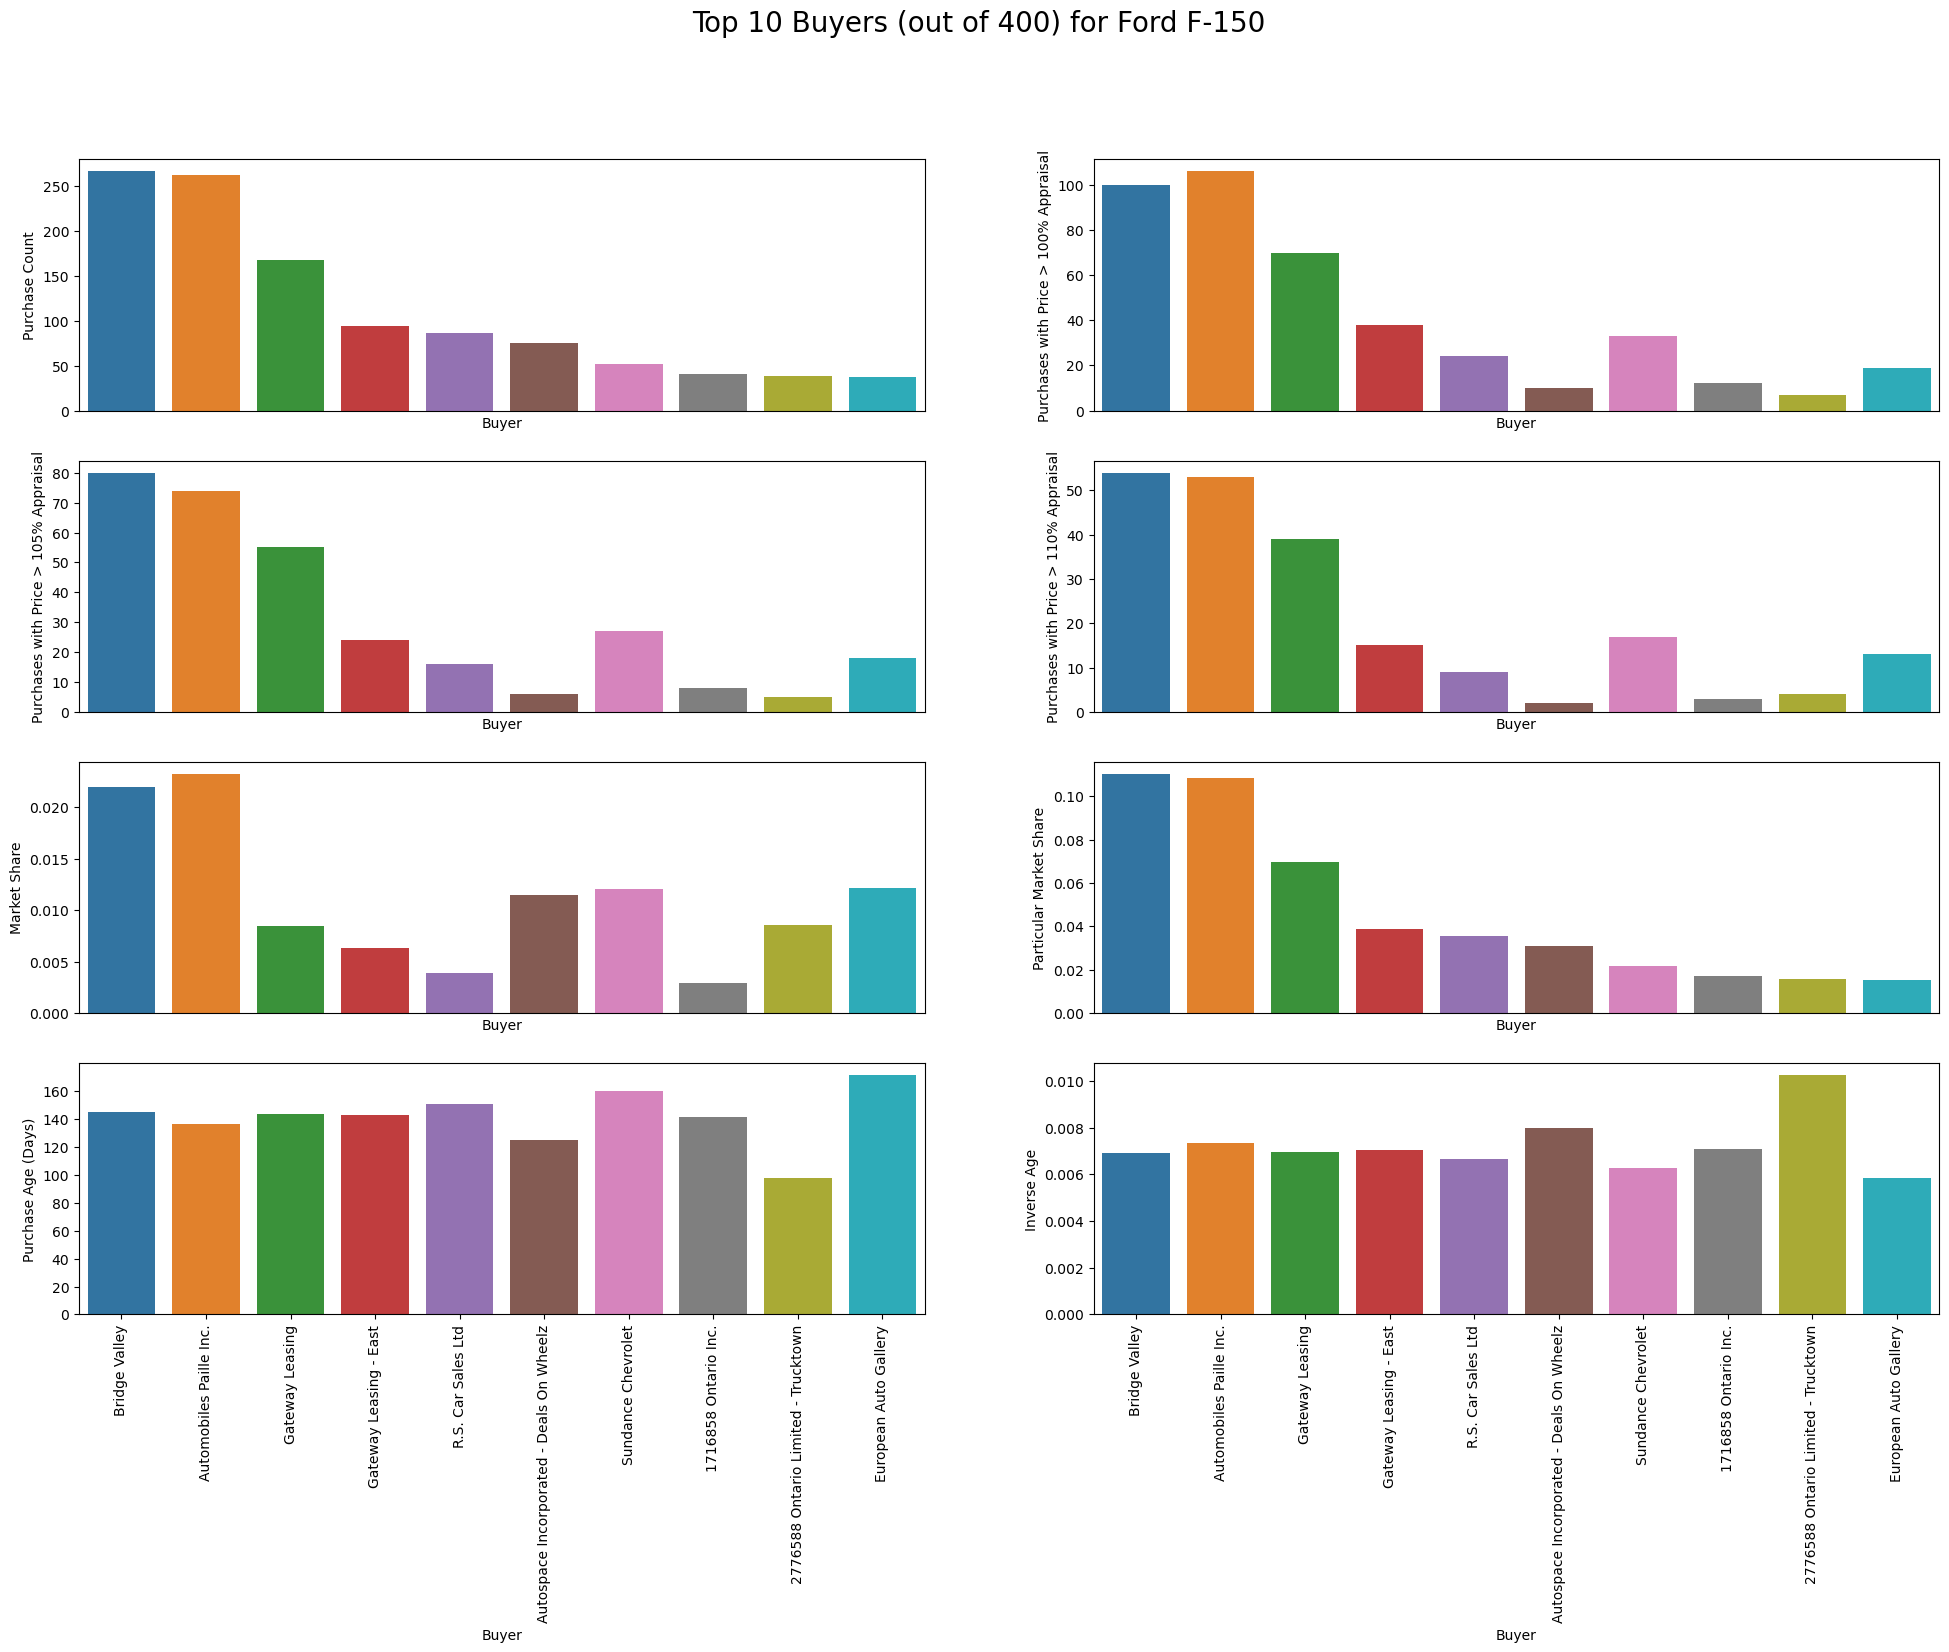

In [52]:
recomendations = get_buyer_recommendations_make_model(temp, 'Ford', 'F-150')

In [53]:
def create_plots_make_model(sorted_combinations: pd.DataFrame, num=20):
  mileage = data["Mileage"].median()

  for index, row in sorted_combinations.head(num).iterrows():
      make, model= row['Make'], row['Model']

      recommendations = get_buyer_recommendations_make_model(temp, make, model)
      plt.show()

      fig, ax = plt.subplots(figsize=(24, 10))
      ax.axis('tight')
      ax.axis('off')
      table_data = recommendations.head(10)
      table = ax.table(cellText=table_data.values, colLabels=table_data.columns, loc='center')
      plt.title(f"Top 10 Buyers (out of {len(recommendations)}) for {make} {model}", fontsize=20)
      plt.show()

In [54]:
combination_counts = data.groupby(['Make', 'Model']).size().reset_index(name='count')
sorted_combinations = combination_counts.sort_values(by='count', ascending=False)
print(sorted_combinations)

        Make          Model  count
295     Ford          F-150   2411
796      Ram           1500   1341
287     Ford         Escape   1315
408  Hyundai        Elantra   1262
350      GMC    Sierra 1500   1119
..       ...            ...    ...
800      Ram   4500 Chassis      1
801      Ram           5500      1
802      Ram   5500 Chassis      1
803      Ram      Cargo Van      1
983    Volvo  XC90 Recharge      1

[984 rows x 3 columns]


In [55]:
def create_plots_make_model(sorted_combinations: pd.DataFrame, num=20):
  mileage = data["Mileage"].median()

  for index, row in sorted_combinations.head(num).iterrows():
      make, model = row['Make'], row['Model']

      recommendations = get_buyer_recommendations_make_model(temp, make, model)
      plt.show()

      fig, ax = plt.subplots(figsize=(24, 10))
      ax.axis('tight')
      ax.axis('off')
      table_data = recommendations.head(10)
      table = ax.table(cellText=table_data.values, colLabels=table_data.columns, loc='center')
      plt.title(f"Top 10 Buyers (out of {len(recommendations)}) for {make} {model}", fontsize=20)
      plt.show()


In [56]:
# create_plots_make_model(sorted_combinations)

In [57]:
def create_report_make_model(sorted_combinations: pd.DataFrame, num=20):
  pdf = PdfPages('buyer_recommendations_report_make_model.pdf')

  mileage = data["Mileage"].median()

  for index, row in sorted_combinations.head(num).iterrows():
      make, model = row['Make'], row['Model']

      recommendations = get_buyer_recommendations_make_model(temp, make, model)

      pdf.savefig(plt.gcf())
      plt.close()

      fig, ax = plt.subplots(figsize=(24, 10))
      ax.axis('tight')
      ax.axis('off')
      table_data = recommendations.head(10)
      table = ax.table(cellText=table_data.values, colLabels=table_data.columns, loc='center')
      plt.title(f"Top 10 Buyers (out of {len(recommendations)}) for {make} {model}", fontsize=20)
      pdf.savefig(fig, bbox_inches='tight')
      plt.close()

  pdf.close()


In [58]:
create_report_make_model(sorted_combinations)

In [59]:
def prep_data_make_model(sorted_combinations: pd.DataFrame, rec_count: int = 20, buyer_count: int = 20):
  mileage = temp["Mileage"].median()
  results = []
  for index, row in sorted_combinations.head(rec_count).iterrows():
      make, model = row['Make'], row['Model']
      recommendations = filter_data_make_model(temp, make, model).head(buyer_count)
      recommendations["Make"] = make
      recommendations["Model"] = model
      recommendations = recommendations[["Make", "Model", "Buyer", "Greater100", "Greater105", "Greater110", "Purchase Count", "Market Share", "Particular Market Share", "Purchase Age", "Inverse Age"]]
      results.append(recommendations)

  return pd.concat(results, axis=0).reset_index(drop=True)


In [ ]:
rec_30_100 = prep_data_make_model(sorted_combinations, rec_count=100, buyer_count=30)

In [ ]:
rec_30_100.head()

In [ ]:
rec_30_100.to_csv("buyer_recommendations_make_model.csv", index=False)

In [ ]:
rec_30_100.shape